Time takes to achieve target error-per-second 10^-6 m/s for each method:
Non-adaptive method:  0.51999 seconds
Adaptive method:  0.14412 seconds


Text(0.5, 1.0, 'Size of the time step as a function of time for adaptive method')

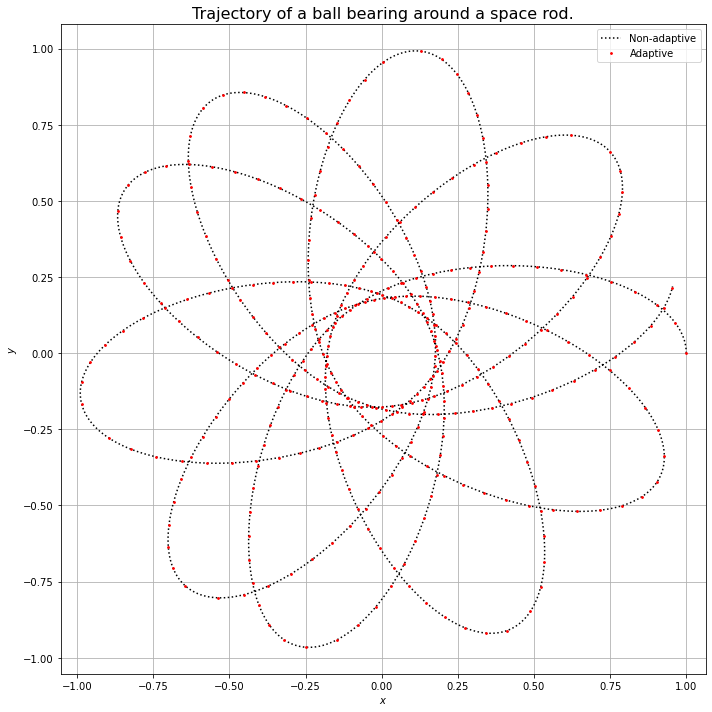

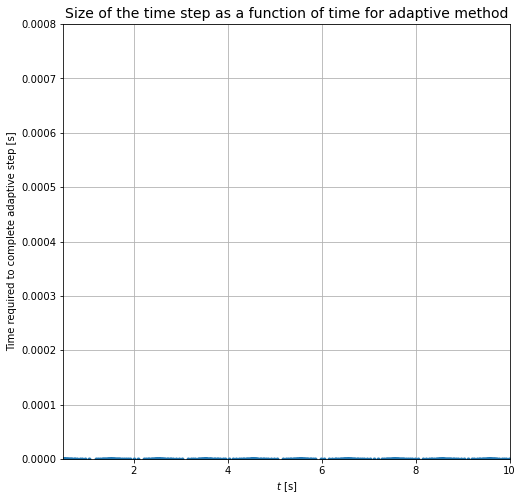

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time


def rhs(r):
    """ The right-hand-side of the equations
    INPUT:
    r = [x, vx, y, vy] are floats (not arrays)
    note: no explicit dependence on time
    OUTPUT:
    1x2 numpy array, rhs[0] is for x, rhs[1] is for vx, etc"""
    M = 10.
    L = 2.

    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]

    r2 = x**2 + y**2
    Fx, Fy = - M * np.array([x, y], float) / (r2 * np.sqrt(r2 + .25*L**2))
    return np.array([vx, Fx, vy, Fy], float)


################################# Q1a ########################################
# %% This next part adapted from Newman's odesim.py --------------------------|
a = 0.0
b = 10.0
N = 1000  # let's leave it at that for now
h = (b-a)/N

tpoints_rk4 = np.arange(a, b, h)
xpoints_rk4 = []
vxpoints_rk4 = []  # the future dx/dt
ypoints_rk4 = []
vypoints_rk4 = []  # the future dy/dt

# below: ordering is x, dx/dt, y, dy/dt
r_rk4 = np.array([1., 0., 0., 1.], float)
# Eq.8.33
for t in tpoints_rk4:
    xpoints_rk4.append(r_rk4[0])
    vxpoints_rk4.append(r_rk4[1])
    ypoints_rk4.append(r_rk4[2])
    vypoints_rk4.append(r_rk4[3])
    k1 = h*rhs(r_rk4)  # all the k's are vectors
    k2 = h*rhs(r_rk4 + 0.5*k1)  # note: no explicit dependence on time of the RHSs
    k3 = h*rhs(r_rk4 + 0.5*k2)
    k4 = h*rhs(r_rk4 + k3)
    r_rk4 += (k1 + 2*k2 + 2*k3 + k4)/6

# Adaptive step
delta = 1e-6    # [m/s]
N = 1000
h = (b-a)/N

# Start timing for adaptive method
start = time()

tpoints_original = np.arange(a, b, h)
tpoints_adaptive = []
x_points_adaptive = []
vx_points_adaptive = []
y_points_adaptive = []
vy_points_adaptive = []

t = a
r_adaptive = np.array([1., 0., 0., 1.], float)

while t < b:
    x_points_adaptive.append(r_adaptive[0])
    vx_points_adaptive.append(r_adaptive[1])
    y_points_adaptive.append(r_adaptive[2])
    vy_points_adaptive.append(r_adaptive[3])
    
    tpoints_adaptive.append(t)
    
    rho = 0
    
    while rho < 1:
        r_big_step = r_adaptive.copy()
        r_small_step = r_adaptive.copy()
        #h_cur = tpoints_adaptive[t] - tpoints_adaptive[t-1]
        
        # Small step x(t+h) 2 times (x1)
        for _ in range(2):
            k1 = h * rhs(r_small_step)  # all the k's are vectors
            k2 = h * rhs(r_small_step + 0.5*k1)  # note: no explicit dependence on time of the RHSs
            k3 = h * rhs(r_small_step + 0.5*k2)
            k4 = h * rhs(r_small_step + k3)
            r_small_step += (k1 + 2*k2 + 2*k3 + k4)/6
        
        # Big step x(t+2h) (x2)
        k1 = 2*h * rhs(r_big_step)
        k2 = 2*h * rhs(r_big_step + 0.5*k1)
        k3 = 2*h * rhs(r_big_step + 0.5*k2)
        k4 = 2*h * rhs(r_big_step + k3)
        r_big_step += (k1 + 2*k2 + 2*k3 + k4)/6
        
        error_x = (r_small_step[0] - r_big_step[0])/30
        error_y = (r_small_step[2] - r_big_step[2])/30
        rho = h*delta / np.sqrt(error_x**2 + error_y**2)
        
        new_h = h * rho**0.25
        
        # Prevent new step size goes to infinity
        if new_h > 5*h:
            new_h = 5*h
        
        h = new_h
    
    # Calculate the next t location
    t = t + 2*h
    
    # Actual RK4 method using updated step (with 2h)
    for _ in range(2):
        k1 = h * rhs(r_adaptive)  # all the k's are vectors
        k2 = h * rhs(r_adaptive + 0.5*k1)  # note: no explicit dependence on time of the RHSs
        k3 = h * rhs(r_adaptive + 0.5*k2)
        k4 = h * rhs(r_adaptive + k3)
        r_adaptive += (k1 + 2*k2 + 2*k3 + k4)/6

end = time()
adaptive_time = end - start

plt.figure(figsize=(10,10))
plt.plot(xpoints_rk4, ypoints_rk4, 'k:', markersize=1.5, label='Non-adaptive')
plt.plot(x_points_adaptive, y_points_adaptive, 'r.', markersize=3.5, label='Adaptive')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Trajectory of a ball bearing around a space rod.', fontsize=16)
plt.axis('equal')
plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig('Q1a.png', dpi=150)


################################# Q1b ########################################
a = 0.0
b = 10.0
N = 10000  # let's leave it at that for now
h = (b-a)/N

start = time()
tpoints_rk4 = np.arange(a, b, h)
xpoints_rk4 = []
vxpoints_rk4 = []  # the future dx/dt
ypoints_rk4 = []
vypoints_rk4 = []  # the future dy/dt

# below: ordering is x, dx/dt, y, dy/dt
r_rk4 = np.array([1., 0., 0., 1.], float)
# Eq.8.33
for t in tpoints_rk4:
    xpoints_rk4.append(r_rk4[0])
    vxpoints_rk4.append(r_rk4[1])
    ypoints_rk4.append(r_rk4[2])
    vypoints_rk4.append(r_rk4[3])
    k1 = h*rhs(r_rk4)  # all the k's are vectors
    k2 = h*rhs(r_rk4 + 0.5*k1)  # note: no explicit dependence on time of the RHSs
    k3 = h*rhs(r_rk4 + 0.5*k2)
    k4 = h*rhs(r_rk4 + k3)
    r_rk4 += (k1 + 2*k2 + 2*k3 + k4)/6

end = time()
non_adaptive_time = end - start

print("Time takes to achieve target error-per-second 10^-6 m/s for each method:")
print(f"Non-adaptive method: {non_adaptive_time: .5f} seconds")
print(f"Adaptive method: {adaptive_time: .5f} seconds")

#%%
################################ Q1c #########################################
# Adpative step
delta = 1e-6    # [m/s]
N = 1000
h = (b-a)/N

timing_individual = []

tpoints_original = np.arange(a, b, h)
tpoints_adaptive = []
x_points_adaptive = []
vx_points_adaptive = []
y_points_adaptive = []
vy_points_adaptive = []

t = a
r_adaptive = np.array([1., 0., 0., 1.], float)

while t < b:
    x_points_adaptive.append(r_adaptive[0])
    vx_points_adaptive.append(r_adaptive[1])
    y_points_adaptive.append(r_adaptive[2])
    vy_points_adaptive.append(r_adaptive[3])
    
    tpoints_adaptive.append(t)
    
    rho = 0
    start_each = time()
    while rho < 1:
        r_big_step = r_adaptive.copy()
        r_small_step = r_adaptive.copy()
        #h_cur = tpoints_adaptive[t] - tpoints_adaptive[t-1]
        
        # Small step x(t+h) 2 times (x1)
        for _ in range(2):
            k1 = h * rhs(r_small_step)  # all the k's are vectors
            k2 = h * rhs(r_small_step + 0.5*k1)  # note: no explicit dependence on time of the RHSs
            k3 = h * rhs(r_small_step + 0.5*k2)
            k4 = h * rhs(r_small_step + k3)
            r_small_step += (k1 + 2*k2 + 2*k3 + k4)/6
        
        # Big step x(t+2h) (x2)
        k1 = 2*h * rhs(r_big_step)
        k2 = 2*h * rhs(r_big_step + 0.5*k1)
        k3 = 2*h * rhs(r_big_step + 0.5*k2)
        k4 = 2*h * rhs(r_big_step + k3)
        r_big_step += (k1 + 2*k2 + 2*k3 + k4)/6
        
        error_x = (r_small_step[0] - r_big_step[0])/30
        error_y = (r_small_step[2] - r_big_step[2])/30
        rho = h*delta / np.sqrt(error_x**2 + error_y**2)
        
        new_h = h * rho**0.25
        
        # Prevent new step size goes to infinity
        if new_h > 5*h:
            new_h = 5*h
        
        h = new_h
    
    # Calculate the next t location
    t = t + 2*h
    
    # Actual RK4 method using updated step (with 2h)
    for _ in range(2):
        k1 = h * rhs(r_adaptive)  # all the k's are vectors
        k2 = h * rhs(r_adaptive + 0.5*k1)  # note: no explicit dependence on time of the RHSs
        k3 = h * rhs(r_adaptive + 0.5*k2)
        k4 = h * rhs(r_adaptive + k3)
        r_adaptive += (k1 + 2*k2 + 2*k3 + k4)/6
    
    end_each = time()
    timing_individual.append(end_each - start_each)

#%%
plt.figure(figsize=(8,8))
plt.plot(tpoints_adaptive, timing_individual, '.')
plt.xlabel("$t$ [s]")
plt.ylabel("Time required to complete adaptive step [s]")
plt.grid()
plt.xlim([0.5, 10])
plt.ylim([0,0.0008])
plt.title("Size of the time step as a function of time for adaptive method", fontsize=14)